# Predict Salary using Experience 
    Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

# Importing Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf

# Importing Data

In [15]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Linearity Check

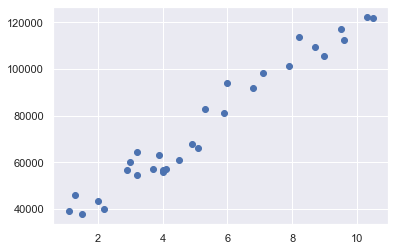

In [17]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.show()

# Creating Linear Regression Model

In [18]:
model = smf.ols('Salary ~ YearsExperience',data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        10:51:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [19]:
inputs = pd.DataFrame(data['YearsExperience'])

In [20]:
predictions = model.predict(inputs)
predictions = pd.DataFrame(predictions, columns = ['Predictions'])
predictions.head()

,Predictions
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306


In [21]:
predictions['targets'] = data['Salary']
predictions['Residuals'] = predictions['targets'] - predictions['Predictions']
predictions.head()

,Predictions,targets,Residuals
0,36187.158752,39343.0,3155.841248
1,38077.151217,46205.0,8127.848783
2,39967.143681,37731.0,-2236.143681
3,44692.124842,43525.0,-1167.124842
4,46582.117306,39891.0,-6691.117306


# Normality of Residuals Check

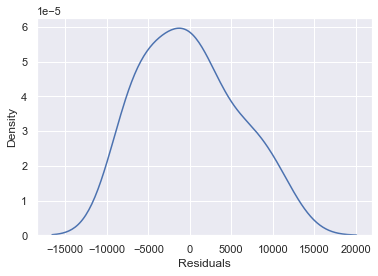

In [22]:
sns.kdeplot(predictions['Residuals'])
plt.show()

# Homoscedasticity Check

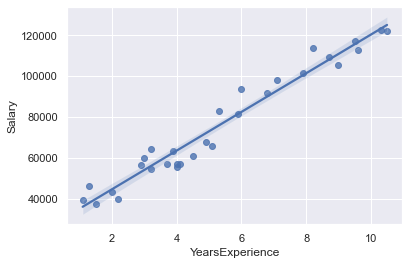

In [23]:
sns.regplot(x = data['YearsExperience'], y = data['Salary'], data = data)
plt.show()

# No Auto-Correlation

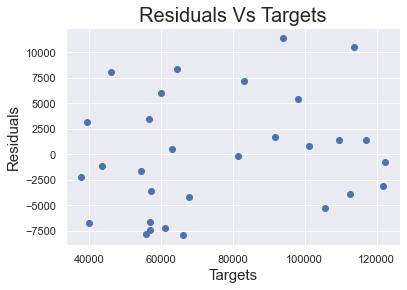

In [24]:
plt.scatter(x = predictions['targets'],y = predictions['Residuals'])
plt.title('Residuals Vs Targets',fontsize = 20)
plt.xlabel('Targets',fontsize = 15)
plt.ylabel('Residuals',fontsize = 15)
plt.show()

# Semi Log Transformation 1

In [30]:
semi_log_data1 = {'Log_Experience': np.log(data['YearsExperience']),
                  'Salary'        : data['Salary']
                 }
semi_log_data1 = pd.DataFrame(semi_log_data1)

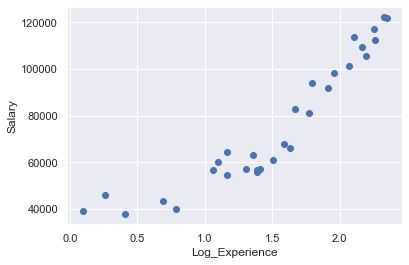

In [33]:
plt.scatter(semi_log_data1['Log_Experience'], semi_log_data1['Salary'])
plt.xlabel('Log_Experience')
plt.ylabel('Salary')
plt.show()

In [37]:
semi_log_model1 = smf.ols('Log_Experience ~ Salary',data = semi_log_data1).fit()
semi_log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Log_Experience   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.25e-13
Time:                        10:58:19   Log-Likelihood:                0.92814
No. Observations:                  30   AIC:                             2.144
Df Residuals:                      28   BIC:                             4.946
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Semi Log Transformation 2

In [32]:
semi_log_data2 = {'Experience' : data['YearsExperience'],
                  'Log_Salary' : np.log(data['Salary'])
                 }
semi_log_data2 = pd.DataFrame(semi_log_data2)

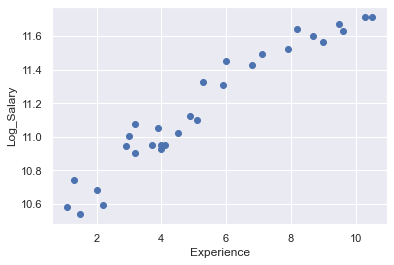

In [34]:
plt.scatter(semi_log_data2['Experience'], semi_log_data2['Log_Salary'])
plt.xlabel('Experience')
plt.ylabel('Log_Salary')
plt.show()

In [36]:
semi_log_model2 = smf.ols('Experience ~ Log_Salary',data = semi_log_data2).fit()
semi_log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Experience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           7.03e-18
Time:                        10:57:51   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -77.6961      4.241    -18.322      0.000     -86.383     -69.009
Log_Salary     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log-Transformation

In [25]:
log_data = {'Log_Experience': np.log(data['YearsExperience']),
            'Log_Salary' : np.log(data['Salary'])
           }
log_data = pd.DataFrame(log_data)

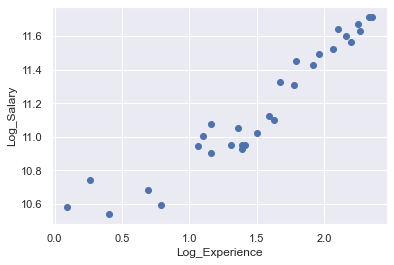

In [29]:
plt.scatter(log_data['Log_Experience'], log_data['Log_Salary'])
plt.xlabel('Log_Experience')
plt.ylabel('Log_Salary')
plt.show()

In [27]:
log_model = smf.ols('Log_Experience ~ Log_Salary',data = log_data).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Log_Experience   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           7.40e-16
Time:                        10:51:16   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4901      1.101    -14.977      0.000     -18.745     -14.235
Log_Salary     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model without Transformations is the Best Fit Model for this Data.